#Importing modules

In [0]:
from google.colab import drive

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, adjusted_rand_score,homogeneity_score, completeness_score
from sklearn.metrics import make_scorer

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt

#Loading the dataset

In [0]:
drive.mount('/content/drive')
data_set = pd.read_csv('drive/My Drive/train.csv')

#delete useless column
del data_set['Unnamed: 0']

#Dataset analysis

We have a dataset with 20 columns;on each column there are 20 documents written by the same author.
The documents have 500.000 words(with a few exceptions where the size goes under 100.000).

In [0]:
print('Dataset shape : ', data_set.shape)

columns = list(data_set.head(0))
print('Dataset column heads : ', columns)

for column in columns:
  print('Author', column, ' : ')
  for doc in data_set[column]:
    print(len(doc))


#Dataset preparation

In [0]:
#get the authors
columnHead = data_set.columns.values

#build an array with all the documents
results = np.array(400)
for author in columnHead:
    results = np.append(results, list(data_set[author]))

results = np.delete(results, 0)

#build an array with the labels
labels = np.array(400)
for i in range(20):
    for j in range(20):
        labels = np.append(labels, i)

labels = np.delete(labels, 0)

#Text classification

##Split the data

In [0]:
#split the data set
x_train, x_test, y_train, y_test = model_selection.train_test_split(results, labels, test_size=0.3)

##Transform the dataset

Set the min_df and max_df so we will keep only the words which can help us describing a class.

In [0]:
#get the tfidf scores
tf_idf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.4, max_df=0.8)

tfidf_train = tf_idf.fit_transform(x_train)
tfidf_test = tf_idf.transform(x_test)

##Tuning the parameters

In [0]:
def grid_search(trainer, parameters, x_train, y_train, x_test, y_test):
  
  gs = GridSearchCV(trainer, parameters, n_jobs=-1, cv=10)
  gs.fit(x_train, y_train)
  
  print('Best parameters : ')
  print(gs.best_params_)

  print('Results : ')
  means = gs.cv_results_['mean_test_score']
  stds  = gs.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, gs.cv_results_['params']):
      print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))
      
  print()
      
  #the authors are represented by their indexes in the authors array(columnsHead)
  print('The results on the test set')
  y_pred = gs.predict(x_test)
  print(classification_report(y_test, y_pred))

  return means

In [0]:
parameters = [
              {'kernel': ['rbf', 'sigmoid', 'poly'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 50, 100, 500, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 50, 100, 500, 1000]}
             ]

means = grid_search(SVC(), parameters, tfidf_train, y_train, tfidf_test, y_test)


Best parameters : 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Results : 
0.0714 (+/-0.0966) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.0714 (+/-0.0966) for {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.0714 (+/-0.0966) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.0714 (+/-0.0966) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.0714 (+/-0.0966) for {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.0714 (+/-0.0966) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.0714 (+/-0.0966) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.0714 (+/-0.0966) for {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.0714 (+/-0.0966) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.0714 (+/-0.0966) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.0714 (+/-0.0966) for {'C': 10, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.0714 (+/-0.0966) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.1393 (+/-0.1250) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.0714 (+/-0.0966) for {'C': 50, 'gamma': 0.001

It seems like linear and rbf are the best choices.Let's see their behaviours while variating the C parameter.

Best parameters : 
{'C': 42.625, 'kernel': 'linear'}
Results : 
0.9607 (+/-0.0906) for {'C': 1.0, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 42.625, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 84.25, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 125.875, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 167.5, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 209.125, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 250.75, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 292.375, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 334.0, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 375.625, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 417.25, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 458.875, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 500.5, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 542.125, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 583.75, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {'C': 625.375, 'kernel': 'linear'}
0.9643 (+/-0.0845) for {

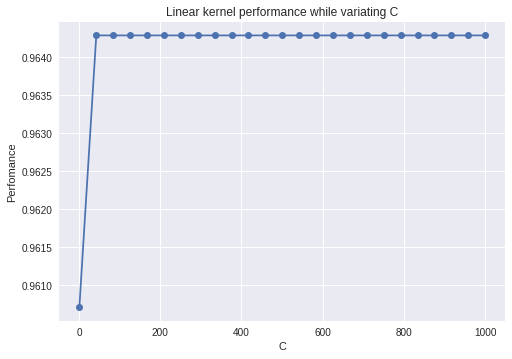

Best parameters : 
{'C': 1000.0, 'kernel': 'rbf'}
Results : 
0.0714 (+/-0.0966) for {'C': 1.0, 'kernel': 'rbf'}
0.0714 (+/-0.0966) for {'C': 42.625, 'kernel': 'rbf'}
0.0714 (+/-0.0966) for {'C': 84.25, 'kernel': 'rbf'}
0.0714 (+/-0.0966) for {'C': 125.875, 'kernel': 'rbf'}
0.0714 (+/-0.0966) for {'C': 167.5, 'kernel': 'rbf'}
0.1286 (+/-0.1290) for {'C': 209.125, 'kernel': 'rbf'}
0.2429 (+/-0.2023) for {'C': 250.75, 'kernel': 'rbf'}
0.3179 (+/-0.2090) for {'C': 292.375, 'kernel': 'rbf'}
0.4357 (+/-0.1656) for {'C': 334.0, 'kernel': 'rbf'}
0.5429 (+/-0.1611) for {'C': 375.625, 'kernel': 'rbf'}
0.6214 (+/-0.1125) for {'C': 417.25, 'kernel': 'rbf'}
0.6571 (+/-0.1154) for {'C': 458.875, 'kernel': 'rbf'}
0.6964 (+/-0.0893) for {'C': 500.5, 'kernel': 'rbf'}
0.7250 (+/-0.1018) for {'C': 542.125, 'kernel': 'rbf'}
0.7464 (+/-0.1237) for {'C': 583.75, 'kernel': 'rbf'}
0.8107 (+/-0.1398) for {'C': 625.375, 'kernel': 'rbf'}
0.8393 (+/-0.1223) for {'C': 667.0, 'kernel': 'rbf'}
0.8679 (+/-0.1230) for

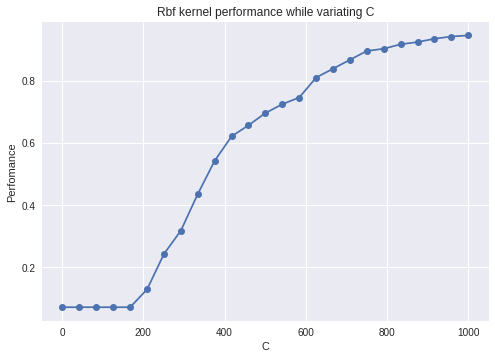

In [0]:
parameters = [
              {'kernel': ['linear'], 'C': np.linspace(1, 1000, num=25)}
             ]

means = grid_search(SVC(), parameters, tfidf_train, y_train, tfidf_test, y_test)

plt.title('Linear kernel performance while variating C')
plt.xlabel('C')
plt.ylabel('Perfomance')
plt.plot(parameters[0]['C'], means, 'o-')


plt.show()

parameters = [
              {'kernel': ['rbf'], 'C': np.linspace(1, 1000, num=25)}
             ]

means = grid_search(SVC(), parameters, tfidf_train, y_train, tfidf_test, y_test)

plt.title('Rbf kernel performance while variating C')
plt.xlabel('C')
plt.ylabel('Perfomance')
plt.plot(parameters[0]['C'], means, 'o-')


plt.show()

In [0]:
def evaluate_model_svc(model_name, x_train, y_train, x_test, y_test, param_k, param_c, param_gamma = 0):
    model = SVC(kernel = param_k, C = param_c)
    if(param_gamma > 0):
      model.gamma = param_gamma
      
    model.fit(x_train, y_train)
    
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    
    print((str)(model_name), ' score : ', accuracy)
    print(classification_report(y_test, prediction))
    print()

##Linear kernel:bigger the C,smaller the performance

In [0]:
evaluate_model_svc('Linear kernel', tfidf_train, y_train, tfidf_test, y_test, 'linear', 20, 1e-3)

Linear kernel  score :  0.9833333333333333
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         7
          4       1.00      0.75      0.86         4
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         3
          7       0.80      1.00      0.89         4
          8       1.00      1.00      1.00         5
          9       1.00      1.00      1.00         5
         10       1.00      1.00      1.00         5
         11       1.00      1.00      1.00         6
         12       1.00      1.00      1.00         5
         13       1.00      1.00      1.00         9
         14       0.91      1.00      0.95        10
         15       1.00      1.00      1.00         8
         16       1.00      1.00      1.00         4
  

## Rbf kernel:bigger the C,bigger the performance

In [0]:
evaluate_model_svc('Rbf kernel', tfidf_train, y_train, tfidf_test, y_test, 'rbf', 1000, 1e-3)

Rbf kernel  score :  0.9833333333333333
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         7
          4       1.00      0.75      0.86         4
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         3
          7       0.80      1.00      0.89         4
          8       1.00      1.00      1.00         5
          9       1.00      1.00      1.00         5
         10       1.00      1.00      1.00         5
         11       1.00      1.00      1.00         6
         12       1.00      1.00      1.00         5
         13       1.00      1.00      1.00         9
         14       0.91      1.00      0.95        10
         15       1.00      1.00      1.00         8
         16       1.00      1.00      1.00         4
     

The perfomance is ~ 98%

##PCA

Use TruncatedSVD instead of PCA to avoid centring data(couldn't be done due to sparsity).We notice that if the number of features is decreased the model's performance is going down.

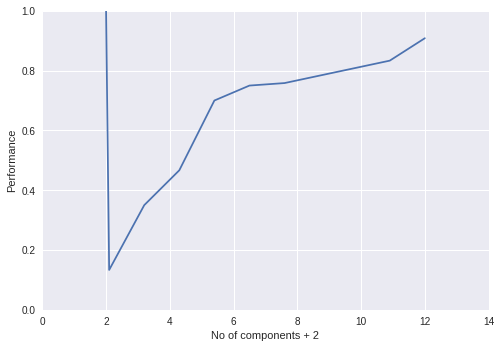

In [0]:
pca_prec = np.array(10, np.float64)

for i in range(10):
  svd = TruncatedSVD(n_components=i+1, n_iter=7, random_state=42)

  principal_comp_train = pd.DataFrame(data = svd.fit_transform(tfidf_train))
  principal_comp_test  = pd.DataFrame(data = svd.transform(tfidf_test))
  
  model = SVC(kernel = 'linear', C = 20)
  model.fit(principal_comp_train, y_train)

  prediction = model.predict(principal_comp_test)
  accuracy = accuracy_score(y_test, prediction)
  
  pca_prec = np.append(pca_prec, accuracy)

plt.ylim(top = 1, bottom = 0)
plt.xlim(right = 14)
plt.xlabel('No of components + 2')
plt.ylabel('Performance')
plt.plot(np.linspace(1,12,num=11), pca_prec)
plt.show()